In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

## Training data

In [3]:
df_2016 = pd.read_csv("../Daten/kelmarsh_scada_2016/kelmarsh_turbine1.csv")
df_2017 = pd.read_csv("../Daten/kelmarsh_scada_2017/kelmarsh_turbine1.csv")
df_2018 = pd.read_csv("../Daten/kelmarsh_scada_2018/kelmarsh_turbine1.csv")
df_2019 = pd.read_csv("../Daten/kelmarsh_scada_2019/kelmarsh_turbine1.csv")

In [4]:
dfs = [df_2016, df_2017, df_2018, df_2019]

# Die DataFrames vertikal zusammenfügen
df_combined = pd.concat(dfs, ignore_index=True)

In [5]:
cutoff_date = "2019-06-30 23:50:00"
df_train = df_combined[df_combined["Date and time"] <= cutoff_date]

In [6]:
df_train["Wind speed, Maximum (m/s)"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
183595    9.281313
183596    9.182932
183597    9.194069
183598    8.225849
183599    9.390460
Name: Wind speed, Maximum (m/s), Length: 183600, dtype: float64

In [7]:
df_train['Date and time'] = pd.to_datetime(df_train['Date and time'], format='mixed', dayfirst=True, errors='coerce')

Die erforderlichen Daten sind nicht vorhanden oder die Spalten fehlen.


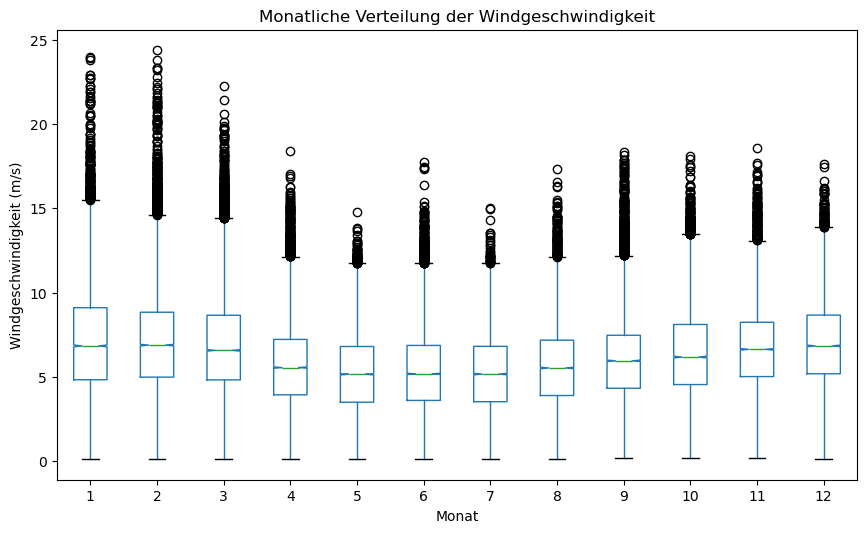

In [9]:
import matplotlib.pyplot as plt

# Extrahiere den Monat aus dem Datum
df_train['Month'] = df_train['Date and time'].dt.month

# Erstelle den Boxplot
df_train.boxplot(column='Wind speed (m/s)', by='Month', grid=False, showfliers=True, figsize=(10,6), notch=True)

# Anpassung des Plots
plt.title("Monatliche Verteilung der Windgeschwindigkeit")
plt.suptitle("")  # Entfernt den übergeordneten Titel
plt.xlabel("Monat")
plt.ylabel("Windgeschwindigkeit (m/s)")
plt.xticks(rotation=0)  # Optionale Anpassung der x-Achsen-Beschriftung
plt.rcParams.update({'font.size': 14})
plt.show()

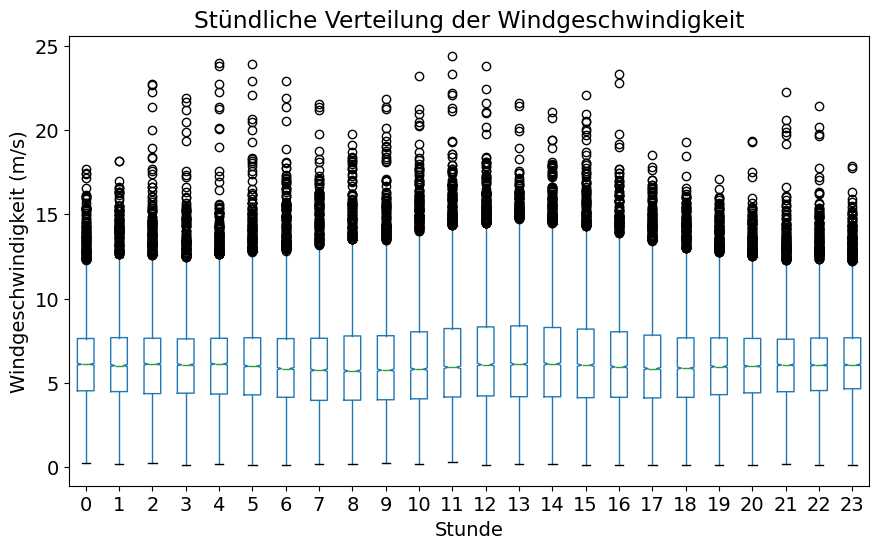

In [113]:
import matplotlib.pyplot as plt

# Extrahiere den Monat aus dem Datum
df_train['Hour'] = df_train['Date and time'].dt.hour

# Erstelle den Boxplot
df_train.boxplot(column='Wind speed (m/s)', by='Hour', grid=False, showfliers=True, figsize=(10,6), notch=True)

# Anpassung des Plots
plt.title("Stündliche Verteilung der Windgeschwindigkeit")
plt.suptitle("")  # Entfernt den übergeordneten Titel
plt.xlabel("Stunde")
plt.ylabel("Windgeschwindigkeit (m/s)")
plt.xticks(rotation=0)  # Optionale Anpassung der x-Achsen-Beschriftung
plt.rcParams.update({'font.size': 14})
plt.show()

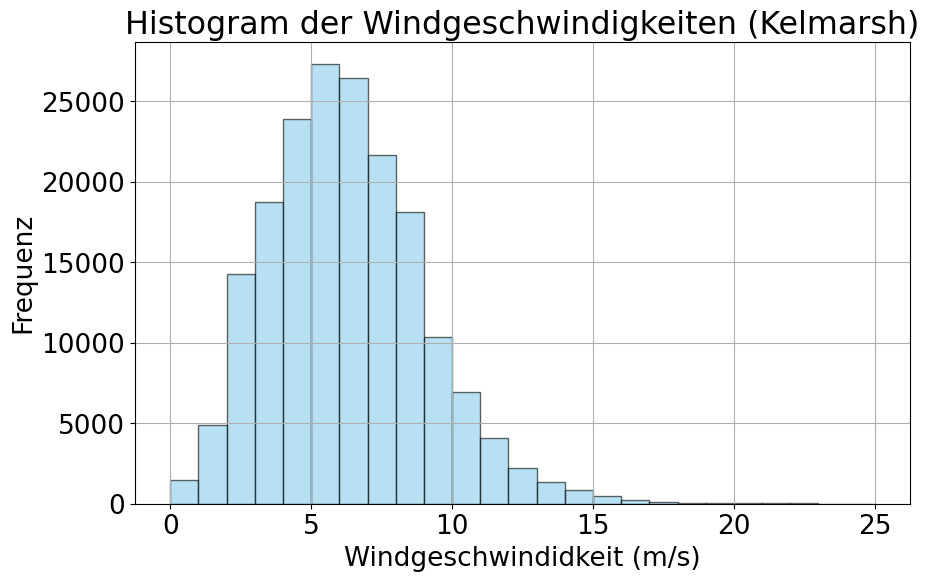

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel für die Datendaten (hier musst du "filtered_df" einsetzen)
filtered_df = df_train['Wind speed (m/s)']  # Deine Windgeschwindigkeitsdaten

# Manuelle Definition der Bin-Grenzen
bin_edges = np.arange(0, filtered_df.max() + 1, 1)  # Starte bei 0, Schrittweite 1

# Histogramm mit manuell definierten Bin-Grenzen
plt.figure(figsize=(10, 6))
plt.hist(filtered_df, bins=bin_edges, density=False, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Histogram der Windgeschwindigkeiten (Kelmarsh)")
plt.xlabel("Windgeschwindidkeit (m/s)")
plt.ylabel("Frequenz")
plt.grid(True)

plt.rcParams.update({'font.size': 19})
plt.show()

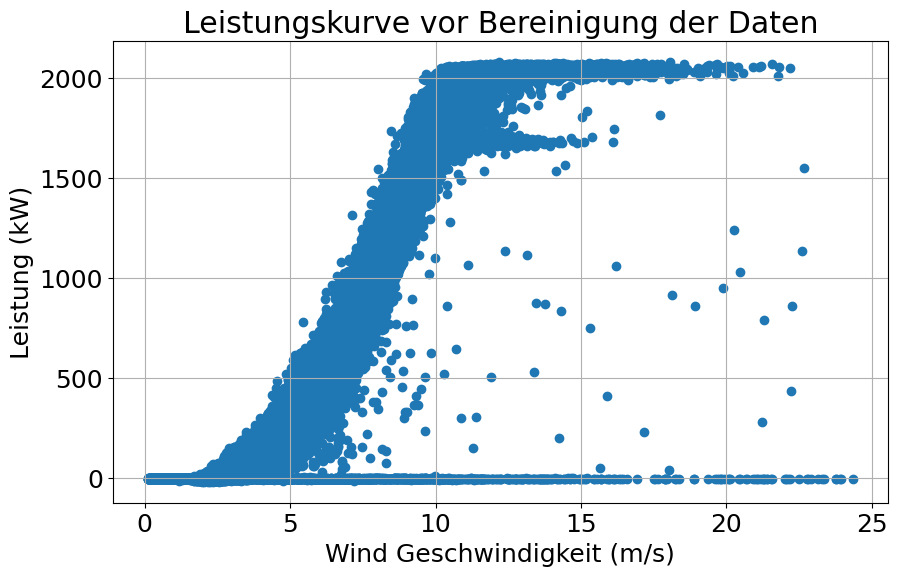

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train["Density adjusted wind speed (m/s)"], df_train['Power (kW)'])
plt.xlabel('Wind Geschwindigkeit (m/s)')
plt.ylabel('Leistung (kW)')
plt.title('Leistungskurve vor Bereinigung der Daten')
plt.grid(True)

plt.rcParams.update({'font.size': 18})
plt.show()

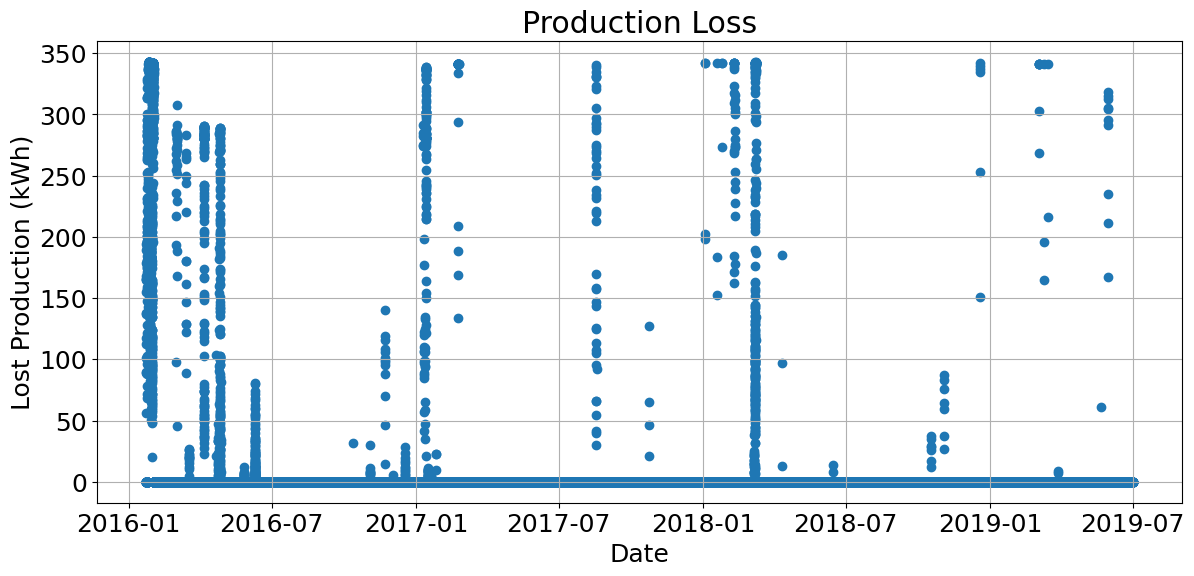

In [13]:
plt.figure(figsize=(14, 6))
plt.scatter(df_train['Date and time'], df_train["Lost Production (Time-based IEC B.3.2) (kWh)"])
plt.xlabel('Date')
plt.ylabel('Lost Production (kWh)')
plt.title('Production Loss')
plt.grid(True)
plt.show()

In [16]:
# Nur numerische Spalten auswählen
numerische_spalten = df_train.select_dtypes(include=['float64', 'int64'])

# Berechnung der Korrelationen mit 'Power (kW)'
korrelationen = numerische_spalten.corr()['Power (kW)']
korrelationen = korrelationen.dropna()
# Ausgabe der Korrelationen


In [17]:
korrelationen = korrelationen.sort_values()
print(korrelationen)

Reactive power, Max (kvar)      -0.959040
Reactive power, Min (kvar)      -0.943580
Reactive power (kvar)           -0.819339
CPU temperature (°C)            -0.564532
Nacelle temperature, Max (°C)   -0.557892
                                   ...   
Current L1 / U (A)               0.999104
Current L3 / W (A)               0.999142
Grid current (A)                 0.999218
Apparent power (kVA)             0.999255
Power (kW)                       1.000000
Name: Power (kW), Length: 170, dtype: float64


In [18]:
# Definiere den Schwellenwert für "Lost Production Total (kWh)"
threshold = 0  # Beispielwert, anpassen je nach Bedarf

# Bedingungen für die zu entfernenden Zeilen
condition = ((df_train["Lost Production Total (kWh)"] >= threshold) | (df_train["Lost Production Total (kWh)"] <= -20)) & (df_train["Wind speed (m/s)"] >= 2.5)


# Entferne die Zeilen, die die Bedingungen erfüllen
df_train = df_train[~condition]

# Zeige das Ergebnis
print(df_train)

             Date and time  Wind speed (m/s)  \
0      2016-01-03 00:00:00               NaN   
1      2016-01-03 00:10:00               NaN   
2      2016-01-03 00:20:00               NaN   
3      2016-01-03 00:30:00               NaN   
4      2016-01-03 00:40:00               NaN   
...                    ...               ...   
183592 2019-06-30 22:40:00          6.259876   
183594 2019-06-30 23:00:00          6.470486   
183596 2019-06-30 23:20:00          7.126949   
183597 2019-06-30 23:30:00          6.990477   
183598 2019-06-30 23:40:00          6.938094   

        Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                                        NaN                        NaN   
1                                        NaN                        NaN   
2                                        NaN                        NaN   
3                                        NaN                        NaN   
4                                        NaN    

In [43]:

condition = (df_train["Yaw bearing angle (°)"] != df_train["Wind direction (°)"]) & (df_train["Wind speed (m/s)"] > 11) & (df_train["Power (kW)"] < 1800)
cond = df_train[condition]
print(cond[["Power (kW)", "Wind speed (m/s)"]])

df_train = df_train[~condition]

        Power (kW)  Wind speed (m/s)
7030   1687.469971         14.870000
8400   1691.729980         11.970000
8401   1683.520020         11.850000
8402   1687.359985         11.550000
8403   1682.500000         11.510000
...            ...               ...
46030  1744.082520         11.109678
46390  1731.172974         11.434451
46392  1789.492554         11.359759
47167  1778.836548         11.127351
53946  1790.145508         11.102117

[242 rows x 2 columns]


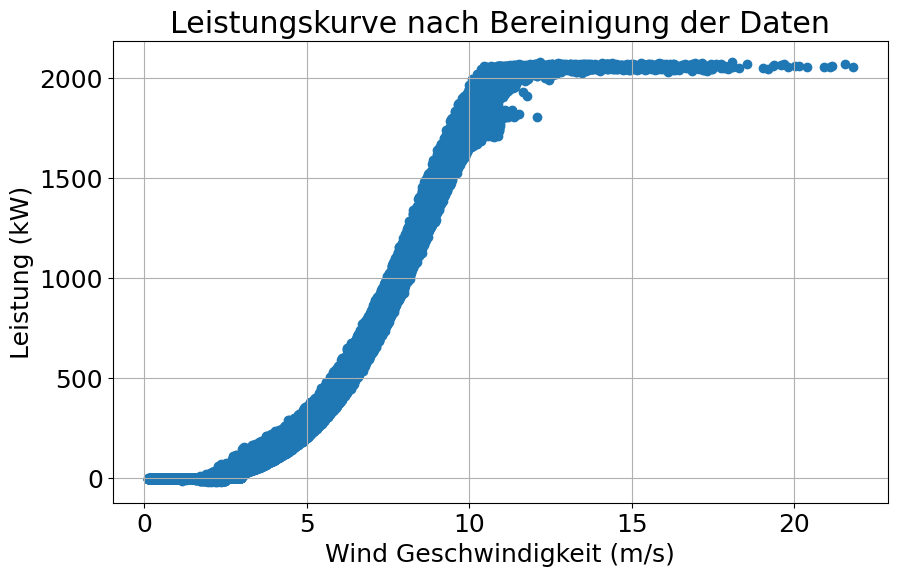

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train["Density adjusted wind speed (m/s)"], df_train['Power (kW)'])
plt.xlabel('Wind Geschwindigkeit (m/s)')
plt.ylabel('Leistung (kW)')
plt.title('Leistungskurve nach Bereinigung der Daten')
plt.grid(True)

plt.rcParams.update({'font.size': 18})
plt.show()

In [72]:
relevant_columns = [
    "Date and time",
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]
df_train = df_train[relevant_columns]

In [73]:
df_train.describe()

,Date and time,Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),Power (kW),Wind speed (m/s)
count,183600,183600.000000,183600.000000,183600.000000,183600.000000,183600.000000
mean,2017-10-01 11:54:59.999998976,6.006508,209.192285,208.061099,584.108198,6.256112
min,2016-01-03 00:00:00,0.110012,0.003519,0.011559,-16.652830,0.110653
25%,2016-11-16 17:57:30,4.479971,156.821153,156.414993,103.490612,4.298260
50%,2017-10-01 11:55:00,5.581678,233.668182,233.244202,371.574249,6.049526
75%,2018-08-16 05:52:30,7.492196,276.818054,268.365997,900.126190,7.950000
max,2019-06-30 23:50:00,24.345412,359.998779,359.982971,2081.028912,24.376621
std,NaN,2.555007,91.013667,90.596239,596.526290,2.738307


In [74]:
df_train["Power (kW)"][df_train["Power (kW)"] < 0] = 0

In [75]:
df_train.describe()

,Date and time,Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),Power (kW),Wind speed (m/s)
count,183600,183600.000000,183600.000000,183600.000000,183600.000000,183600.000000
mean,2017-10-01 11:54:59.999998976,6.006508,209.192285,208.061099,584.403846,6.256112
min,2016-01-03 00:00:00,0.110012,0.003519,0.011559,0.000000,0.110653
25%,2016-11-16 17:57:30,4.479971,156.821153,156.414993,103.490612,4.298260
50%,2017-10-01 11:55:00,5.581678,233.668182,233.244202,371.574249,6.049526
75%,2018-08-16 05:52:30,7.492196,276.818054,268.365997,900.126190,7.950000
max,2019-06-30 23:50:00,24.345412,359.998779,359.982971,2081.028912,24.376621
std,NaN,2.555007,91.013667,90.596239,596.235401,2.738307


In [19]:
df_train.isna().sum()

Date and time                                   0
Wind speed (m/s)                             6384
Wind speed, Standard deviation (m/s)        46472
Wind speed, Minimum (m/s)                   46472
Wind speed, Maximum (m/s)                   46472
                                            ...  
Drive train acceleration, Min (mm/ss)       89375
Drive train acceleration, StdDev (mm/ss)    89375
Tower Acceleration X, StdDev (mm/ss)        89375
Tower Acceleration Y, StdDev (mm/ss)        89375
Month                                           0
Length: 300, dtype: int64

In [20]:
df_numeric = df_train.select_dtypes(include=["float64", "int64"])
df_train[df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [21]:
df_train.isna().sum()

Date and time                                   0
Wind speed (m/s)                                0
Wind speed, Standard deviation (m/s)            0
Wind speed, Minimum (m/s)                       0
Wind speed, Maximum (m/s)                       0
                                            ...  
Drive train acceleration, Min (mm/ss)       89375
Drive train acceleration, StdDev (mm/ss)    89375
Tower Acceleration X, StdDev (mm/ss)        89375
Tower Acceleration Y, StdDev (mm/ss)        89375
Month                                           0
Length: 300, dtype: int64

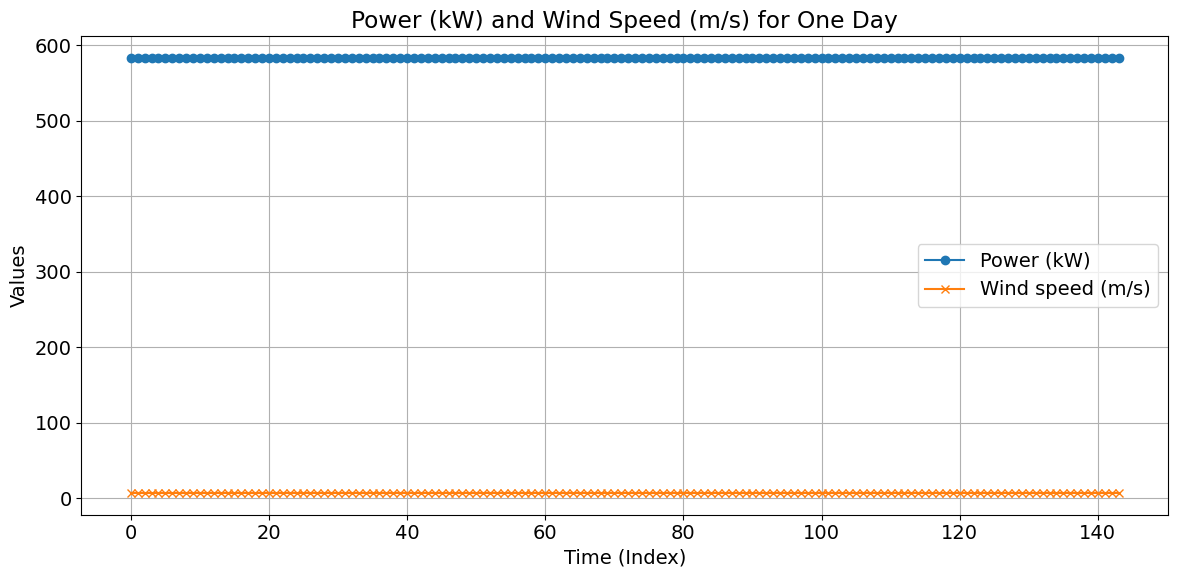

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df_train ist bereits definiert und enthält die notwendigen Spalten
# Sicherstellen, dass df_train nicht leer ist und die Spalten existieren
# Wir filtern die ersten 144 Einträge, die einem Tag entsprechen
df_one_day = df_train.iloc[-144:]

# Erstellen des Plots
plt.figure(figsize=(12, 6))
plt.plot(df_one_day.index, df_one_day['Power (kW)'], label='Power (kW)', marker='o')
plt.plot(df_one_day.index, df_one_day['Wind speed (m/s)'], label='Wind speed (m/s)', marker='x')
plt.title('Power (kW) and Wind Speed (m/s) for One Day')
plt.xlabel('Time (Index)')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()

# Plot anzeigen
plt.show()

# Speichern der ausgewählten Spalten als CSV-Datei
df_one_day[['Power (kW)', 'Wind speed (m/s)']].to_csv('beispiel.csv', index=False)


In [141]:
print(df_train["Date and time"].iloc[start])
print(df_train["Date and time"].iloc[end-1])

2016-03-12 10:40:00
2016-05-11 10:30:00


0        8.070000
1        8.070000
2        8.070000
3        8.070000
4        8.070000
           ...   
18635    6.596022
18636    6.604097
18637    6.612172
18638    6.620247
18639    7.383729
Name: power, Length: 18640, dtype: float64


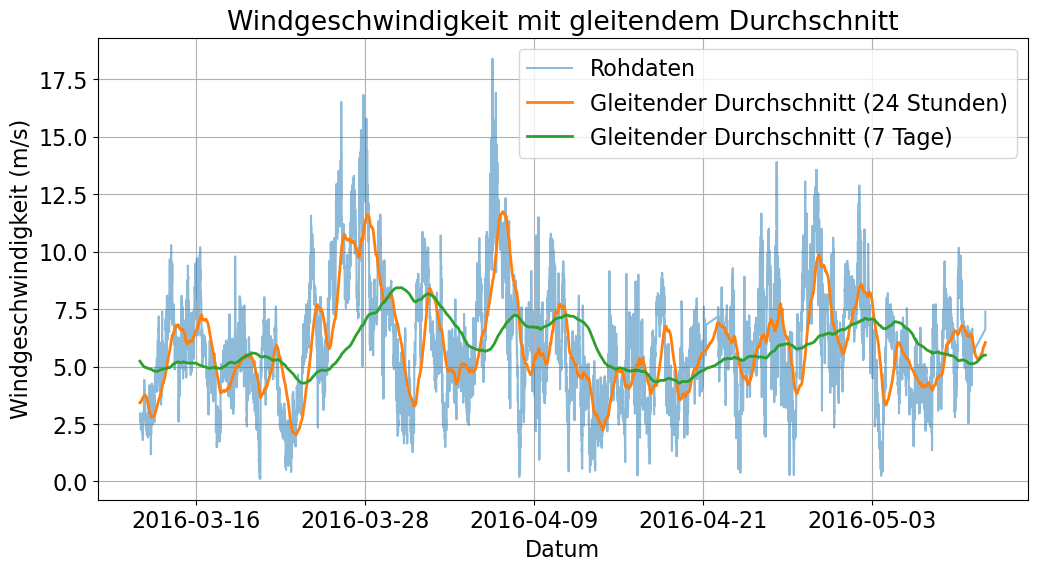

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start = 10000
end = start + 144 * 60


# Erstelle einen DataFrame für einfachere Verarbeitung
df = pd.DataFrame({'power': df_train["Wind speed (m/s)"].iloc[0:end]})

print(df['power'])
# Moving Averages berechnen
df['MA_24h'] = df['power'].rolling(window=144).mean()  # 24-Stunden gleitender Durchschnitt
df['MA_7d'] = df['power'].rolling(window=144*7).mean()  # 24-Stunden gleitender Durchschnitt

# Plotten der Rohdaten und Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df_train["Date and time"].iloc[start:end], df["power"].iloc[start:end], label="Rohdaten", alpha=0.5)
plt.plot(df_train["Date and time"].iloc[start:end], df['MA_24h'].iloc[start:end], label="Gleitender Durchschnitt (24 Stunden)", linewidth=2)
plt.plot(df_train["Date and time"].iloc[start:end], df['MA_7d'].iloc[start:end], label="Gleitender Durchschnitt (7 Tage)", linewidth=2)
plt.title("Windgeschwindigkeit mit gleitendem Durchschnitt")
plt.xlabel("Datum")
plt.ylabel("Windgeschwindigkeit (m/s)")
plt.legend()
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=288))  # Alle 6 Stunden ein Tick
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format der Ticks
plt.rcParams.update({'font.size': 16})
plt.grid()
plt.show()

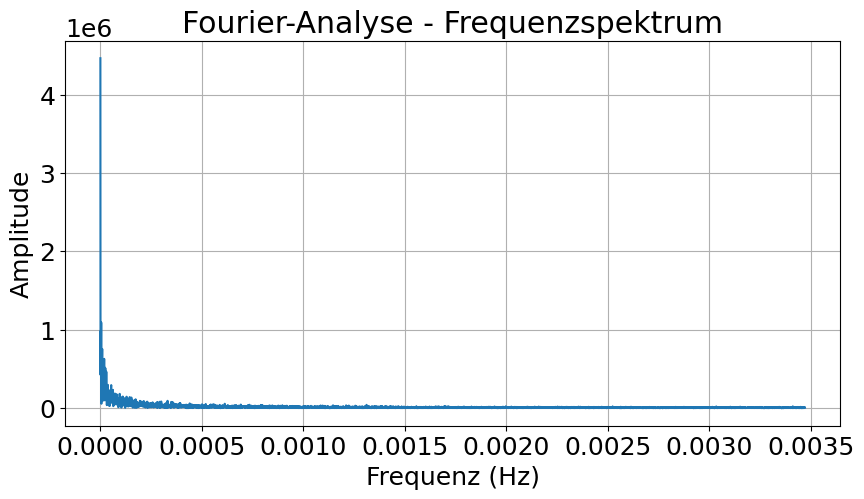

In [82]:
fft_result = np.fft.fft(df['power'])
frequencies = np.fft.fftfreq(len(df['power']), d=(144))  # Frequenzen

# Amplitude (Betrag der Fourier-Koeffizienten)
amplitude = np.abs(fft_result)

# Plot des Spektrums
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], amplitude[:len(frequencies)//2])  # Nur positive Frequenzen
plt.title('Fourier-Analyse - Frequenzspektrum')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [80]:
output_file = "../Daten/train_data.csv"
df_train.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/train_data.csv' gespeichert.


In [81]:
COLUMNS = [
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]

## Validation data

In [63]:
df_2020 = pd.read_csv("../Daten/kelmarsh_scada_2020/kelmarsh_turbine1.csv")

In [64]:
dfs = [df_2019, df_2020]

# Die DataFrames vertikal zusammenfügen
df_combined_val = pd.concat(dfs, ignore_index=True)

In [65]:
relevant_columns = [
    "Date and time",
    "Density adjusted wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Wind speed (m/s)"
]
df_combined_val = df_combined_val[relevant_columns]

In [66]:
cutoff_date = "2020-06-30 23:50:00"
start_date = "2019-07-01 00:00:00"
df_val = df_combined_val[df_combined_val["Date and time"] >= start_date]

df_val = df_val[df_val["Date and time"] <= cutoff_date]

In [68]:
df_val.last

<bound method NDFrame.last of              Date and time  Density adjusted wind speed (m/s)  \
26064  2019-07-01 00:00:00                           7.081436   
26065  2019-07-01 00:10:00                           7.501865   
26066  2019-07-01 00:20:00                           7.818967   
26067  2019-07-01 00:30:00                           7.880522   
26068  2019-07-01 00:40:00                           8.345742   
...                    ...                                ...   
78763  2020-06-30 23:10:00                           4.426198   
78764  2020-06-30 23:20:00                           4.834770   
78765  2020-06-30 23:30:00                           5.535671   
78766  2020-06-30 23:40:00                           4.982858   
78767  2020-06-30 23:50:00                           5.382336   

       Wind direction (°)  Nacelle position (°)   Power (kW)  \
26064          240.009563             239.82959   754.911838   
26065          235.105395             239.82959   902.666745 

In [69]:
df_val["Power (kW)"][df_val["Power (kW)"] < 0] = 0

In [70]:
df_numeric = df_val.select_dtypes(include=["float64", "int64"])
df_val[df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [71]:
output_file = "../Daten/validation_data.csv"
df_val.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/validation_data.csv' gespeichert.


## Test data

In [62]:
df_2021 = pd.read_csv("../Daten/kelmarsh_scada_2021/kelmarsh_turbine1.csv")

In [63]:
dfs = [df_2020, df_2021]

# Die DataFrames vertikal zusammenfügen
df_combined_val = pd.concat(dfs, ignore_index=True)

In [64]:
relevant_columns = [
    "Date and time",
    "Wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
    "Power (kW)", "Density adjusted wind speed (m/s)"
]
df_combined_val = df_combined_val[relevant_columns]

In [65]:
start_date = "2020-07-01 00:00:00"
df_test = df_combined_val[df_combined_val["Date and time"] >= start_date]

In [66]:
df_test.last

<bound method NDFrame.last of              Date and time  Wind speed (m/s)  Wind direction (°)  \
26208  2020-07-01 00:00:00          5.160345          223.299645   
26209  2020-07-01 00:10:00          5.494860          225.088881   
26210  2020-07-01 00:20:00          5.021182          234.076822   
26211  2020-07-01 00:30:00          5.238322          241.270169   
26212  2020-07-01 00:40:00          5.862007          227.233162   
...                    ...               ...                 ...   
78763  2021-06-30 23:10:00          3.840000           39.950001   
78764  2021-06-30 23:20:00          4.130000           39.709999   
78765  2021-06-30 23:30:00          3.780000           42.220001   
78766  2021-06-30 23:40:00          1.920000           41.730000   
78767  2021-06-30 23:50:00          2.020000           33.930000   

       Nacelle position (°)  Power (kW)  Density adjusted wind speed (m/s)  
26208            210.185474  281.819361                           5.110880  

In [67]:
df_test["Power (kW)"][df_test["Power (kW)"] < 0] = 0

In [68]:
duplicates = df_test.columns[df_test.columns.duplicated()]
print("Doppelte Spaltennamen:", duplicates)

Doppelte Spaltennamen: Index([], dtype='object')


In [69]:
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

In [70]:
df_numeric = df_test.select_dtypes(include=["float64", "int64"])
df_test.loc[:, df_numeric.columns] = df_numeric.interpolate().fillna(method="bfill").fillna(method="ffill")

In [71]:
output_file = "../Daten/test_data.csv"
df_test.to_csv(output_file, index=False)

print(f"Gefilterte Daten wurden als '{output_file}' gespeichert.")

Gefilterte Daten wurden als '../Daten/test_data.csv' gespeichert.


# Windspeed data

In [72]:
import pandas as pd

# Datei laden (ersetzen Sie 'daten.csv' durch den tatsächlichen Dateinamen)
datei = '../Daten/winddata_eu/winddata_eu_100m.csv'
df = pd.read_csv(datei)

# Konvertieren Sie das Datum in ein Datetime-Format
df['Date'] = pd.to_datetime(df['Date'])

# Filtern Sie die Daten nach dem gewünschten Zeitraum
start_date = '2016-01-01'
end_date = '2024-12-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extrahieren Sie nur die Spalten 'Date' und 'UKF3'
df_result = df_filtered[['Date', 'UKF3']]

# Ergebnisse anzeigen
print(df_result)

# Optional: Ergebnisse in eine neue CSV-Datei speichern
output_file = '../Daten/wind_speed_ukf3_2016_2024.csv'
df_result.to_csv(output_file, index=False)
print(f"Die gefilterten Daten wurden in '{output_file}' gespeichert.")

                      Date      UKF3
324336 2016-01-01 00:00:00  8.619554
324337 2016-01-01 01:00:00  7.641271
324338 2016-01-01 02:00:00  6.789032
324339 2016-01-01 03:00:00  5.275001
324340 2016-01-01 04:00:00  4.212524
...                    ...       ...
401777 2024-10-31 19:00:00  5.714038
401778 2024-10-31 20:00:00  5.670762
401779 2024-10-31 21:00:00  5.881939
401780 2024-10-31 22:00:00  6.324793
401781 2024-10-31 23:00:00  6.319351

[77446 rows x 2 columns]
Die gefilterten Daten wurden in '../Daten/wind_speed_ukf3_2016_2024.csv' gespeichert.
